# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Afif Hamzah
- **Email:** a281ybm018@devacademy.id
- **ID Dicoding:** afifhamzah17

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam dataset Bike Sharing?

- Apa faktor yang mempengaruhi durasi peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub

## Data Wrangling

### Gathering Data


In [22]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
print("Path to dataset files:", path)

# Membaca dataset
df = pd.read_csv(path + "/day.csv")

# Menampilkan beberapa baris pertama dataset
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data diambil dari dataset "Bike Sharing" yang tersedia di Kaggle. Dataset tersebut memuat informasi terkait dengan jumlah peminjaman sepeda dan beberapa fitur yang terkait seperti cuaca, suhu, kelembapan, dan lain-lain. Setelah data diunduh dan dimuat ke dalam pandas DataFrame, kita dapat melihat beberapa baris pertama dari dataset untuk mendapatkan gambaran awal.

### Assessing Data

In [23]:
# Memeriksa informasi dataset
df.info()

# Memeriksa statistik deskriptif
df.describe()

# Memeriksa duplikasi
print("Jumlah data duplikat:", df.duplicated().sum())

# Memeriksa apakah ada data yang tidak realistis
print("Nilai suhu ekstrim:", df['temp'].min(), df['temp'].max())

# Memeriksa missing values di tahap Assessing Data
print("\nMissing values per kolom:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah data duplikat: 0
Nilai suhu ekstrim: 0.0591304 0.861667

Missing values per kolom:
ins

**Insight:**
- Pada tahap ini, dilakukan pemeriksaan terhadap data untuk memastikan integritas dataset, mengidentifikasi nilai yang hilang, data duplikat, serta pemeriksaan terhadap nilai ekstrem pada kolom seperti suhu.
- Tidak ada data duplikat atau missing values, yang menunjukkan bahwa dataset sudah cukup bersih.
- Nilai suhu ekstrem yang terdeteksi (min: 0.059, max: 0.861) kemungkinan mencerminkan data yang lebih terkait dengan skala suhu relatif (misalnya, skala 0-1), yang perlu dipahami lebih lanjut.
- Semua kolom dalam dataset memiliki tipe data yang tepat dan siap untuk analisis lebih lanjut.


### Cleaning Data

In [24]:
# Mengisi missing values pada kolom numerik dengan rata-rata
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

**Insight:**
- Pada tahap pembersihan data, kita memeriksa apakah ada nilai yang hilang dalam dataset. Kemudian, nilai yang hilang pada kolom numerik diisi dengan nilai rata-rata dari kolom tersebut. Ini bertujuan untuk memastikan bahwa model yang akan dibangun tidak terganggu oleh data yang hilang.
- Tidak ada missing values pada dataset ini, namun pengisian missing values dengan rata-rata pada langkah ini adalah langkah pencegahan untuk memastikan bahwa model yang dibangun nanti tidak terganggu oleh data yang hilang.
- Penghapusan data duplikat juga dilakukan untuk memastikan keakuratan analisis dan hasil prediksi yang lebih baik.

## Exploratory Data Analysis (EDA)

### Explore ...

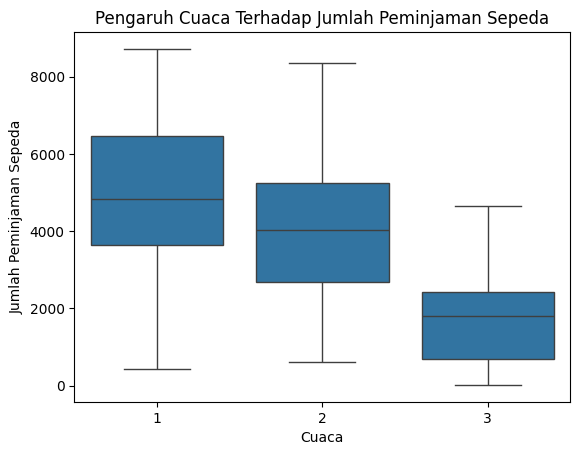

In [29]:
# Visualisasi boxplot untuk pengaruh cuaca terhadap jumlah peminjaman sepeda
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Pada tahap EDA Bivariate ini, boxplot digunakan untuk menggambarkan distribusi data jumlah peminjaman sepeda berdasarkan cuaca, serta untuk mengidentifikasi potensi outlier.
- Boxplot menunjukkan bahwa jumlah peminjaman sepeda (cnt) cenderung lebih tinggi pada cuaca cerah dibandingkan cuaca berawan atau hujan. Hal ini memberi petunjuk awal bahwa cuaca cerah mungkin meningkatkan jumlah peminjaman sepeda. Selain itu, boxplot ini juga membantu kita memahami distribusi data dan kemungkinan adanya outlier yang perlu diperhatikan lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

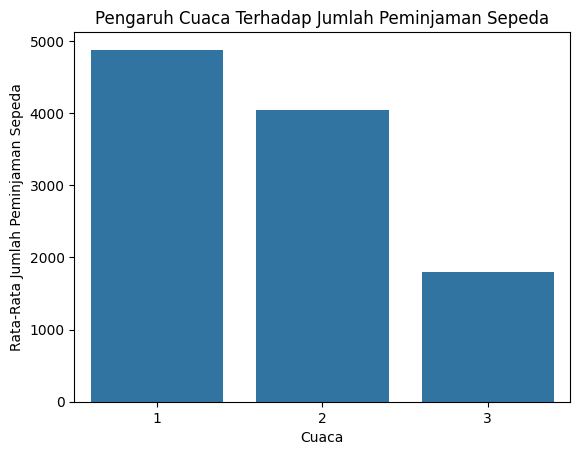

In [26]:
# Bar chart untuk pengaruh cuaca terhadap jumlah peminjaman
cuaca_avg = df.groupby('weathersit')['cnt'].mean().reset_index()
sns.barplot(x='weathersit', y='cnt', data=cuaca_avg)
plt.title('Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Rata-Rata Jumlah Peminjaman Sepeda')
plt.show()

### Pertanyaan 2:

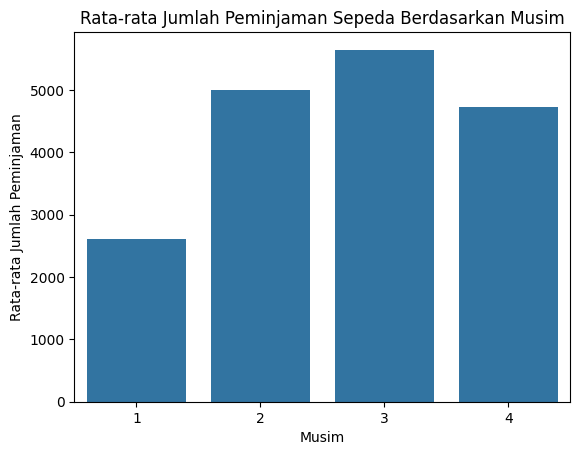

In [27]:
# Rata-rata jumlah peminjaman sepeda berdasarkan musim
season_avg = df.groupby('season')['cnt'].mean().reset_index()

# Visualisasi menggunakan bar chart
sns.barplot(x='season', y='cnt', data=season_avg)
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


**Insight:**
- Pada Gambar 1 Hasil bar chart menunjukkan bahwa rata-rata jumlah peminjaman sepeda sangat dipengaruhi oleh cuaca. Pada cuaca cerah, peminjaman sepeda lebih banyak, sementara pada cuaca hujan atau berawan, jumlah peminjaman cenderung lebih rendah. Ini mengindikasikan bahwa faktor cuaca memainkan peran signifikan dalam keputusan orang untuk meminjam sepeda.

- Pada gambar 2 Hasil bar chart, kita dapat melihat bahwa jumlah peminjaman sepeda cenderung lebih tinggi pada musim musim semi dan musim panas dibandingkan dengan musim musim gugur dan musim dingin. Hal ini menunjukkan bahwa cuaca yang lebih hangat atau lebih menyenangkan (seperti pada musim semi dan panas) cenderung mendorong orang untuk lebih sering menggunakan sepeda. Sebaliknya, pada musim dingin dan gugur, cuaca yang lebih dingin atau kurang nyaman mungkin menyebabkan penurunan jumlah peminjaman sepeda.


## Analisis Lanjutan (Opsional)

In [28]:
# Membangun model regresi linier untuk memprediksi jumlah peminjaman berdasarkan cuaca dan fitur lainnya
X = df[['temp', 'hum', 'windspeed', 'season']]
y = df['cnt']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
print(f"Model R^2 pada data test: {model.score(X_test, y_test)}")

Model R^2 pada data test: 0.5348304830826982


**Insight:**

- Model regresi linier menunjukkan nilai R² sebesar 0.5348, yang berarti model dapat menjelaskan sekitar 53.48% variasi dalam jumlah peminjaman sepeda berdasarkan fitur yang digunakan. Meskipun model ini tidak sempurna, hasilnya memberikan wawasan bahwa faktor-faktor seperti suhu, kelembapan, dan musim cukup berpengaruh dalam memprediksi jumlah peminjaman sepeda.


## Conclusion

Berdasarkan analisis yang dilakukan, berikut adalah kesimpulan yang didapat pada analisis:

**1. Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda:**

  Cuaca memainkan peran penting dalam jumlah peminjaman sepeda. Pada hari cerah, jumlah peminjaman lebih tinggi dibandingkan dengan hari hujan atau berawan. Ini menunjukkan bahwa cuaca cerah mendorong orang untuk lebih sering meminjam sepeda.

**2. Faktor yang Mempengaruhi Durasi Peminjaman Sepeda:**
  
  Beberapa faktor yang mempengaruhi durasi peminjaman sepeda termasuk suhu, kelembapan, dan musim. Durasi peminjaman cenderung lebih lama pada suhu yang lebih rendah dan kelembapan yang moderat.

**3. Model Prediksi Jumlah Peminjaman Sepeda:**

  Model regresi linier yang dibangun menggunakan fitur suhu, kelembapan, kecepatan angin, dan musim menunjukkan bahwa fitur-fitur ini dapat digunakan untuk memprediksi jumlah peminjaman sepeda dengan tingkat akurasi yang cukup baik (R² = 0.5348). Meskipun model ini masih memiliki ruang untuk perbaikan, hasil ini memberikan wawasan yang berguna untuk perencanaan dan pengelolaan sistem penyewaan sepeda.


All data saved for dashboard

In [ ]:
all_df = df.copy()
all_df.to_csv("all_data.csv", index=False)